In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df=pd.read_csv(r'insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
data_show=df[['age','bmi','charges']]

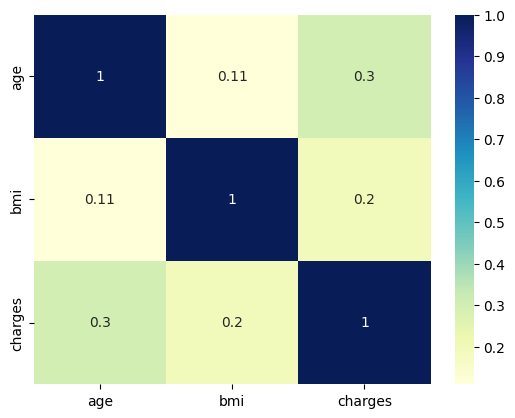

In [18]:
dataplot = sb.heatmap(data_show.corr(), cmap="YlGnBu", annot=True) 


In [19]:
x=df.drop(columns='charges')
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [30]:
encoded_x = pd.get_dummies(x,prefix=['sex','smoker','region'])
encoded_x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [20]:
y=df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [27]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(encoded_x, y, test_size=0.2, random_state=42)

## we try linear regression first !!

In [28]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_pred, y_test))
print("r2 score:", r2_score(y_pred, y_test))

MSE: 33596915.85136147
r2 score: 0.7088351277198339


## Then we try the polynomial regression due the average accuracy that has been given from the linear regression model 


In [40]:
poly_features = PolynomialFeatures(degree=2)

X_poly = poly_features.fit_transform(encoded_x)

X_train, X_test, y_train, y_test= train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [42]:
# Create a Polynomial Regression model
model_2 = LinearRegression()
model_2.fit(X_train[:,1:], y_train)

LinearRegression()

In [43]:
y_pred= model.predict(X_train[:,1:])

r2_score(y_train, y_pred)

0.8418173231535121

In [44]:
y_pred= model.predict(X_test[:,1:])

r2_score(y_test, y_pred)

0.8665830903164855

### Polynomial regression give us better accuracy on the traning data and testing data  